In [39]:
import pandas as p
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import ensemble

In [40]:
d = p.read_csv("pml-training.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (11,14,19,22,25,70,73,86,87,89,90,94,97,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [41]:
d.drop(d.columns[11:35], axis=1,inplace = True)

In [42]:
d.columns.get_loc("classe")

135

In [43]:
d.drop(d.columns[25:35], axis=1,inplace = True)

In [44]:
d.drop(d.columns[34:49], axis=1,inplace = True)

In [45]:
d.shape

(19622, 111)

In [46]:
d.drop(d.columns[37:63], axis=1,inplace = True)

In [47]:
d.shape

(19622, 85)

In [48]:
d.columns.get_loc("classe")

84

In [49]:
d.drop(d.columns[49:75], axis=1,inplace = True)

In [50]:
d.columns.get_loc("classe")

58

In [51]:
d.shape

(19622, 59)

In [52]:
d.drop(d.columns[11], axis=1,inplace = True)

In [243]:
p.isnull(d).sum()

Unnamed: 0              0
user_name               0
raw_timestamp_part_1    0
raw_timestamp_part_2    0
cvtd_timestamp          0
new_window              0
num_window              0
roll_belt               0
pitch_belt              0
yaw_belt                0
total_accel_belt        0
gyros_belt_x            0
gyros_belt_y            0
gyros_belt_z            0
accel_belt_x            0
accel_belt_y            0
accel_belt_z            0
magnet_belt_x           0
magnet_belt_y           0
magnet_belt_z           0
roll_arm                0
pitch_arm               0
yaw_arm                 0
total_accel_arm         0
gyros_arm_x             0
gyros_arm_y             0
gyros_arm_z             0
accel_arm_x             0
accel_arm_y             0
accel_arm_z             0
magnet_arm_x            0
magnet_arm_y            0
magnet_arm_z            0
roll_dumbbell           0
pitch_dumbbell          0
yaw_dumbbell            0
gyros_dumbbell_x        0
gyros_dumbbell_y        0
gyros_dumbbe

In [53]:
clf1 = tree.DecisionTreeClassifier() 

In [54]:
from sklearn import cross_validation

In [55]:
def num(str) :
    if(str=="A") :
        return 1
    elif(str=="B") :
        return 2
    elif(str=="C") :
        return 3
    elif(str=="D") :
        return 4
    else :
        return 5

In [56]:
def num2(str) :
    if(str=="no") :
        return 1
    elif(str=="yes") :
        return 2

In [57]:
def num3(str) :
    if(str=="carlitos") :
        return 1
    elif(str=="pedro") :
        return 2
    elif(str=="adelmo") :
        return 3
    elif(str=="charles") :
        return 4
    elif(str=="eurico") :
        return 5
    elif(str=="jeremy") :
        return 6
    else :
        return 7

In [58]:
d['classe'] = d['classe'].apply(num)
d['new_window'] = d['new_window'].apply(num2)
d['user_name'] = d['user_name'].apply(num3)

In [59]:
r = d['classe']
del d['classe']
del d['cvtd_timestamp']

In [60]:
x_train,x_test,y_train,y_test = cross_validation.train_test_split(d,r,test_size = 0.05)

In [220]:
d.user_name.unique()

array(['carlitos', 'pedro', 'adelmo', 'charles', 'eurico', 'jeremy'], dtype=object)

In [251]:
d.dtypes

Unnamed: 0                int64
user_name                 int64
raw_timestamp_part_1      int64
raw_timestamp_part_2      int64
new_window                int64
num_window                int64
roll_belt               float64
pitch_belt              float64
yaw_belt                float64
total_accel_belt          int64
gyros_belt_x            float64
gyros_belt_y            float64
gyros_belt_z            float64
accel_belt_x              int64
accel_belt_y              int64
accel_belt_z              int64
magnet_belt_x             int64
magnet_belt_y             int64
magnet_belt_z             int64
roll_arm                float64
pitch_arm               float64
yaw_arm                 float64
total_accel_arm           int64
gyros_arm_x             float64
gyros_arm_y             float64
gyros_arm_z             float64
accel_arm_x               int64
accel_arm_y               int64
accel_arm_z               int64
magnet_arm_x              int64
magnet_arm_y              int64
magnet_a

In [61]:
import pydotplus

In [62]:
clf1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [280]:
y_pred = clf1.predict(x_test)

In [281]:
score = clf1.score(x_test, y_test)
score

0.99898167006109984

In [260]:
dot_data = tree.export_graphviz(clf1,out_file=None, class_names = True, filled = True,special_characters = True)
graph = (pydotplus.graph_from_dot_data(dot_data))
graph.write_pdf("dataaa.pdf")

True

In [272]:
clf = ensemble.RandomForestClassifier() 
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
score = clf.score(x_test,y_test)

In [273]:
score

1.0

In [274]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[276,   0,   0,   0,   0],
       [  0, 188,   0,   0,   0],
       [  0,   0, 179,   0,   0],
       [  0,   0,   0, 155,   0],
       [  0,   0,   0,   0, 184]])

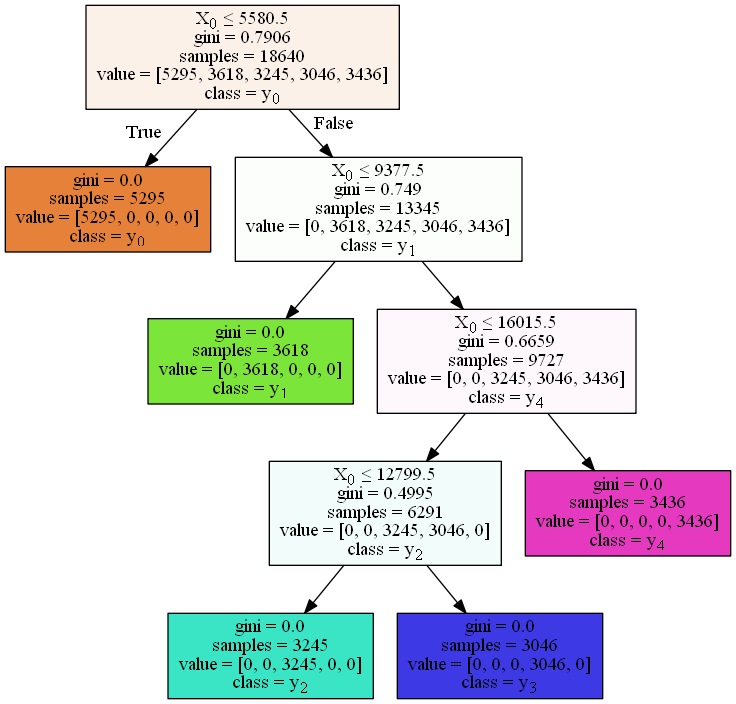

In [63]:
from IPython.display import Image  
dot_data = tree.export_graphviz(clf1,out_file=None, class_names = True, filled = True,special_characters = True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  